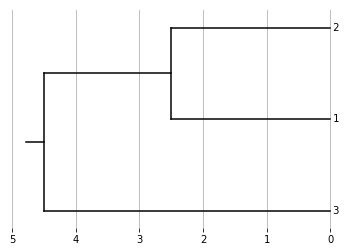

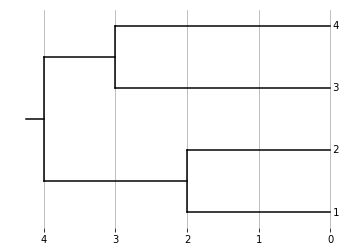

In [1]:
"""
tree69.py
A tree utility library for COMPSCI 369.
"""

# The MIT License (MIT)
#
# Copyright (c) 2016 Arman Bilge and Stuart Bradley
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.

def compute_upgma_tree(matrix):

    import itertools as it

    n = len(matrix)
    nodes = [Node(str(i + 1)) for i in range(n)]
    for node in nodes:
        node.set_height(0)
    matrix = {nodes[i]: {nodes[j]: matrix[i][j] for j in range(n)} for i in range(n)}
    while len(matrix) > 1:
        a, b = min(it.combinations(matrix.keys(), 2), key=lambda xy: matrix[xy[0]][xy[1]])
        u = Node()
        u.add_child(a)
        u.add_child(b)
        u.set_height(matrix[a][b] / 2)
        uc = {c: (a.get_leaf_count() * matrix[a][c] + b.get_leaf_count() * matrix[b][c]) / (a.get_leaf_count() + b.get_leaf_count()) for c in matrix.keys() - set((a, b))}
        del matrix[a]
        del matrix[b]
        for k, v in matrix.items():
            del v[a]
            del v[b]
            v[u] = uc[k]
        matrix[u] = uc
    return Tree(u)

def plot_tree(tree):

    import itertools as it
    import numpy as np
    from matplotlib import pyplot as plt

    def compute_node_xy(node, counter=it.count()):
        node.x = node.get_height()
        if node.is_leaf():
            node.y = next(counter)
        else:
            children = node.get_children()
            for child in children:
                compute_node_xy(child, counter)
            node.y = np.mean([c.y for c in children])

    def plot_node(node):
        if node.is_leaf():
            plt.text(node.x, node.y, ' ' + node.get_label(), {'ha':'left', 'va':'center'})
        else:
            children = node.get_children()
            plt.plot([node.x] * 2, [min(c.y for c in children), max(c.y for c in children)], 'k')
            for child in children:
                plt.plot([node.x, child.x], [child.y] * 2, 'k')
                plot_node(child)

    root = tree.get_root()
    compute_node_xy(root)
    plt.plot([root.x, root.x + root.x/16], [root.y] * 2, 'k')
    plot_node(root)
    lc = tree.get_leaf_count()
    plt.ylim(- lc / 16, 17/16 * lc - 1)
    axes = plt.gca()
    axes.invert_xaxis()
    axes.yaxis.set_visible(False)
    axes.set_frame_on(False)
    axes.grid()
    plt.show()

"""
Python Tree Class
Stuart Bradley - 5931269
23-05-2014
"""
class Tree:

    def __init__(self, root=None):
        self.root = root

    def set_root(self, root):
        self.root = root

    def get_root(self):
        return self.root

    def get_leaves(self):
        return self.root.get_leaves()

    def get_leaf_count(self):
        return self.root.get_leaf_count()

    def get_newick(self):
        return self.root.get_newick() + ";"

    def __str__(self):
        return self.get_newick()

"""
Python Node Class
Stuart Bradley - 5931269
23-05-2014
"""
class Node:
    def __init__(self, label=None):
        self.parent = None
        self.children = []
        self.height = -1.0
        self.label = label
        self.sequence = None

    def get_parent(self):
        return self.parent

    def set_parent(self, parent):
        self.parent = parent

    def get_children(self):
        return self.children

    def add_child(self, child):
        self.children.append(child)
        child.set_parent(self)

    def remove_child(self, child):
        self.children.remove(child)

    def set_height(self, height):
        self.height = height

    def get_height(self):
        return self.height

    def is_root(self):
        return self.parent == None

    def is_leaf(self):
        return not self.children

    def get_sequence(self):
        return self.sequence

    def set_sequence(self, sequence):
        self.sequence = sequence

    def get_label(self):
        return self.label

    def set_label(self, label):
        self.label = label

    def get_leaves(self):
        leaf_list = []

        if (self.is_leaf()):
            leaf_list.append(self)
        else:
            for child in self.children:
                leaf_list.extend(child.get_leaves())

        return leaf_list

    def get_leaf_count(self):
        if self.is_leaf():
            return 1
        else:
            return sum(map(Node.get_leaf_count, self.children))

    def get_newick(self):
        sb = ""

        if (not self.is_leaf()):
            sb += "("
            for i in range(0, len(self.children)):
                if (i>0):
                    sb += ","
                sb += self.children[i].get_newick()
            sb += ")"

        if (self.label != None):
            sb += self.label

        branch_length = -1.0
        if (not self.is_root()):
            branch_length = self.parent.height - self.height
        else:
            branch_length = 0.0

        sb += ":" + str(branch_length)

        return sb

    
# Calculate the UPGMA tree from the distance matrix
tree = compute_upgma_tree([[0, 4, 8, 8], [4, 0, 8, 8], [8, 8, 0, 6], [8, 8, 6, 0]])

# Plot the tree
plot_tree(tree)